<a href="https://colab.research.google.com/github/doctorf72/Naya_ML_RegressionProject/blob/main/Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Regression project Felix Doktorman & Alin Finkelshtein**
```

```



About the dataset:The dataset was downloaded from kaggel https://www.kaggle.com/datasets/chaunguynnghunh/sepsis
It is divided into train and test and the original aim of the data is to predict if the patient will experience sepsis.
Since it is a classification question, we have chosen to ignore the sepsis and focused on PRG feature as our target.

**Column Name	Attribute/Target	Description**

**ID**	N/A	Unique number to represent patient ID

**PRG**	Attribute1	Plasma glucose

**PL**	Attribute 2	Blood Work Result-1 (mu U/ml) -->  PL=platelet count is a lab test to measure how many platelets you have in your blood. Platelets are parts of the blood that helps the blood clot.

**PR**	Attribute 3	Blood Pressure (mm Hg)

**SK**	Attribute 4	Blood Work Result-2 (mm) -->SK measures the amount of potassium  (K+) in blood serum

**TS**	Attribute 5	Blood Work Result-3 (mu U/ml)-->TS indicates the percent of iron binding sites on transferrin that are carrying iron.

**M11**	Attribute 6	Body mass index (weight in kg/(height in m)^2

**BD2**	Attribute 7	Blood Work Result-4 (mu U/ml)

**Age**	Attribute 8	patients age (years)

**Insurance**	N/A	If a patient holds a valid insurance card







In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import plot_tree, export_graphviz
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import pairwise_distances

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#Read the data
df_train = pd.read_csv('Paitients_Files_Train.csv')
df_test = pd.read_csv('Paitients_Files_Test.csv')


## **EDA_train**

In [3]:
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [5]:
df_train.shape

(599, 11)

In [6]:
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df_train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [8]:
df_train.nunique()

ID           599
PRG           17
PL           129
PR            44
SK            51
TS           164
M11          233
BD2          437
Age           50
Insurance      2
Sepssis        2
dtype: int64

Text(0.5, 1.0, 'Data Distribution')

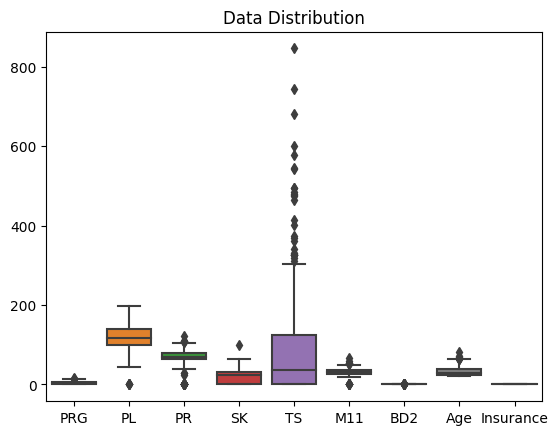

In [9]:
sns.boxplot(data=df_train).set_title('Data Distribution')

Text(0.5, 1.0, 'Data Distribution')

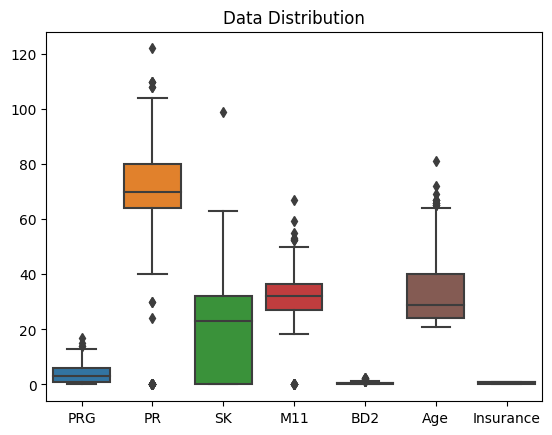

In [10]:
sns.boxplot(data=df_train.drop(['TS','PL'], axis = 1)).set_title('Data Distribution')

Text(0.5, 1.0, 'TS Data Distribution')

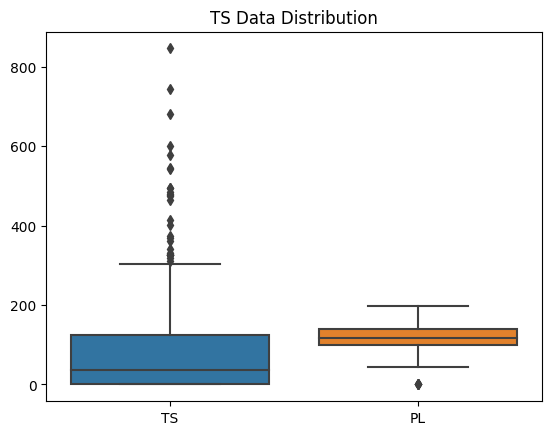

In [11]:
sns.boxplot(data=df_train[['TS','PL']]).set_title('TS Data Distribution')

Text(0.5, 1.0, 'TS and PL features distribution')

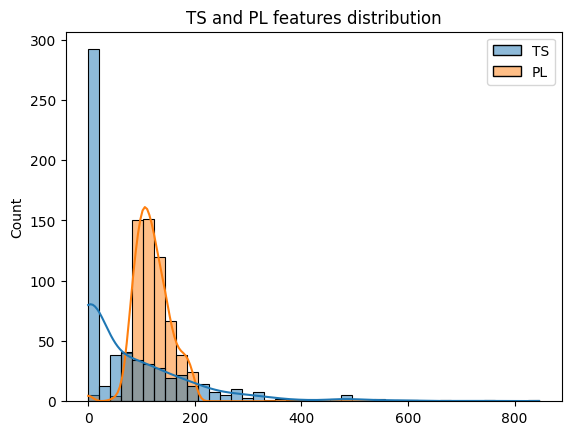

In [12]:
sns.histplot(data=df_train[['TS', 'PL']], kde = True ).set_title("TS and PL features distribution")

### **Removing 6 sigma outliers from TS feature**

Text(0.5, 1.0, 'TS Data Distribution')

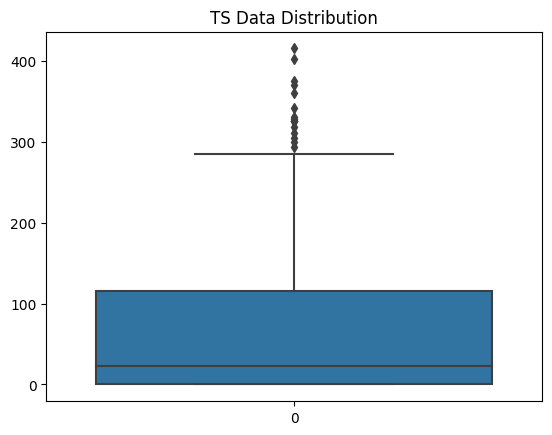

In [13]:
ave = df_train['TS'].mean()
std = df_train['TS'].std()
df_train_wo_outliers = df_train.loc[df_train['TS'].between(ave-3*std, ave+3*std)]
sns.boxplot(data=df_train_wo_outliers['TS']).set_title('TS Data Distribution')

In [14]:
df_train_wo_outliers.shape

(585, 11)

**Train data set exploration**

Text(0.5, 1.0, 'PRG Histogramm')

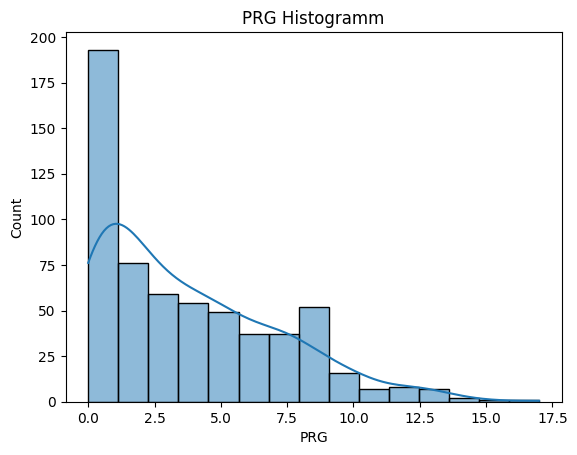

In [15]:
sns.histplot(data=df_train['PRG'], kde = True ).set_title('PRG Histogramm')

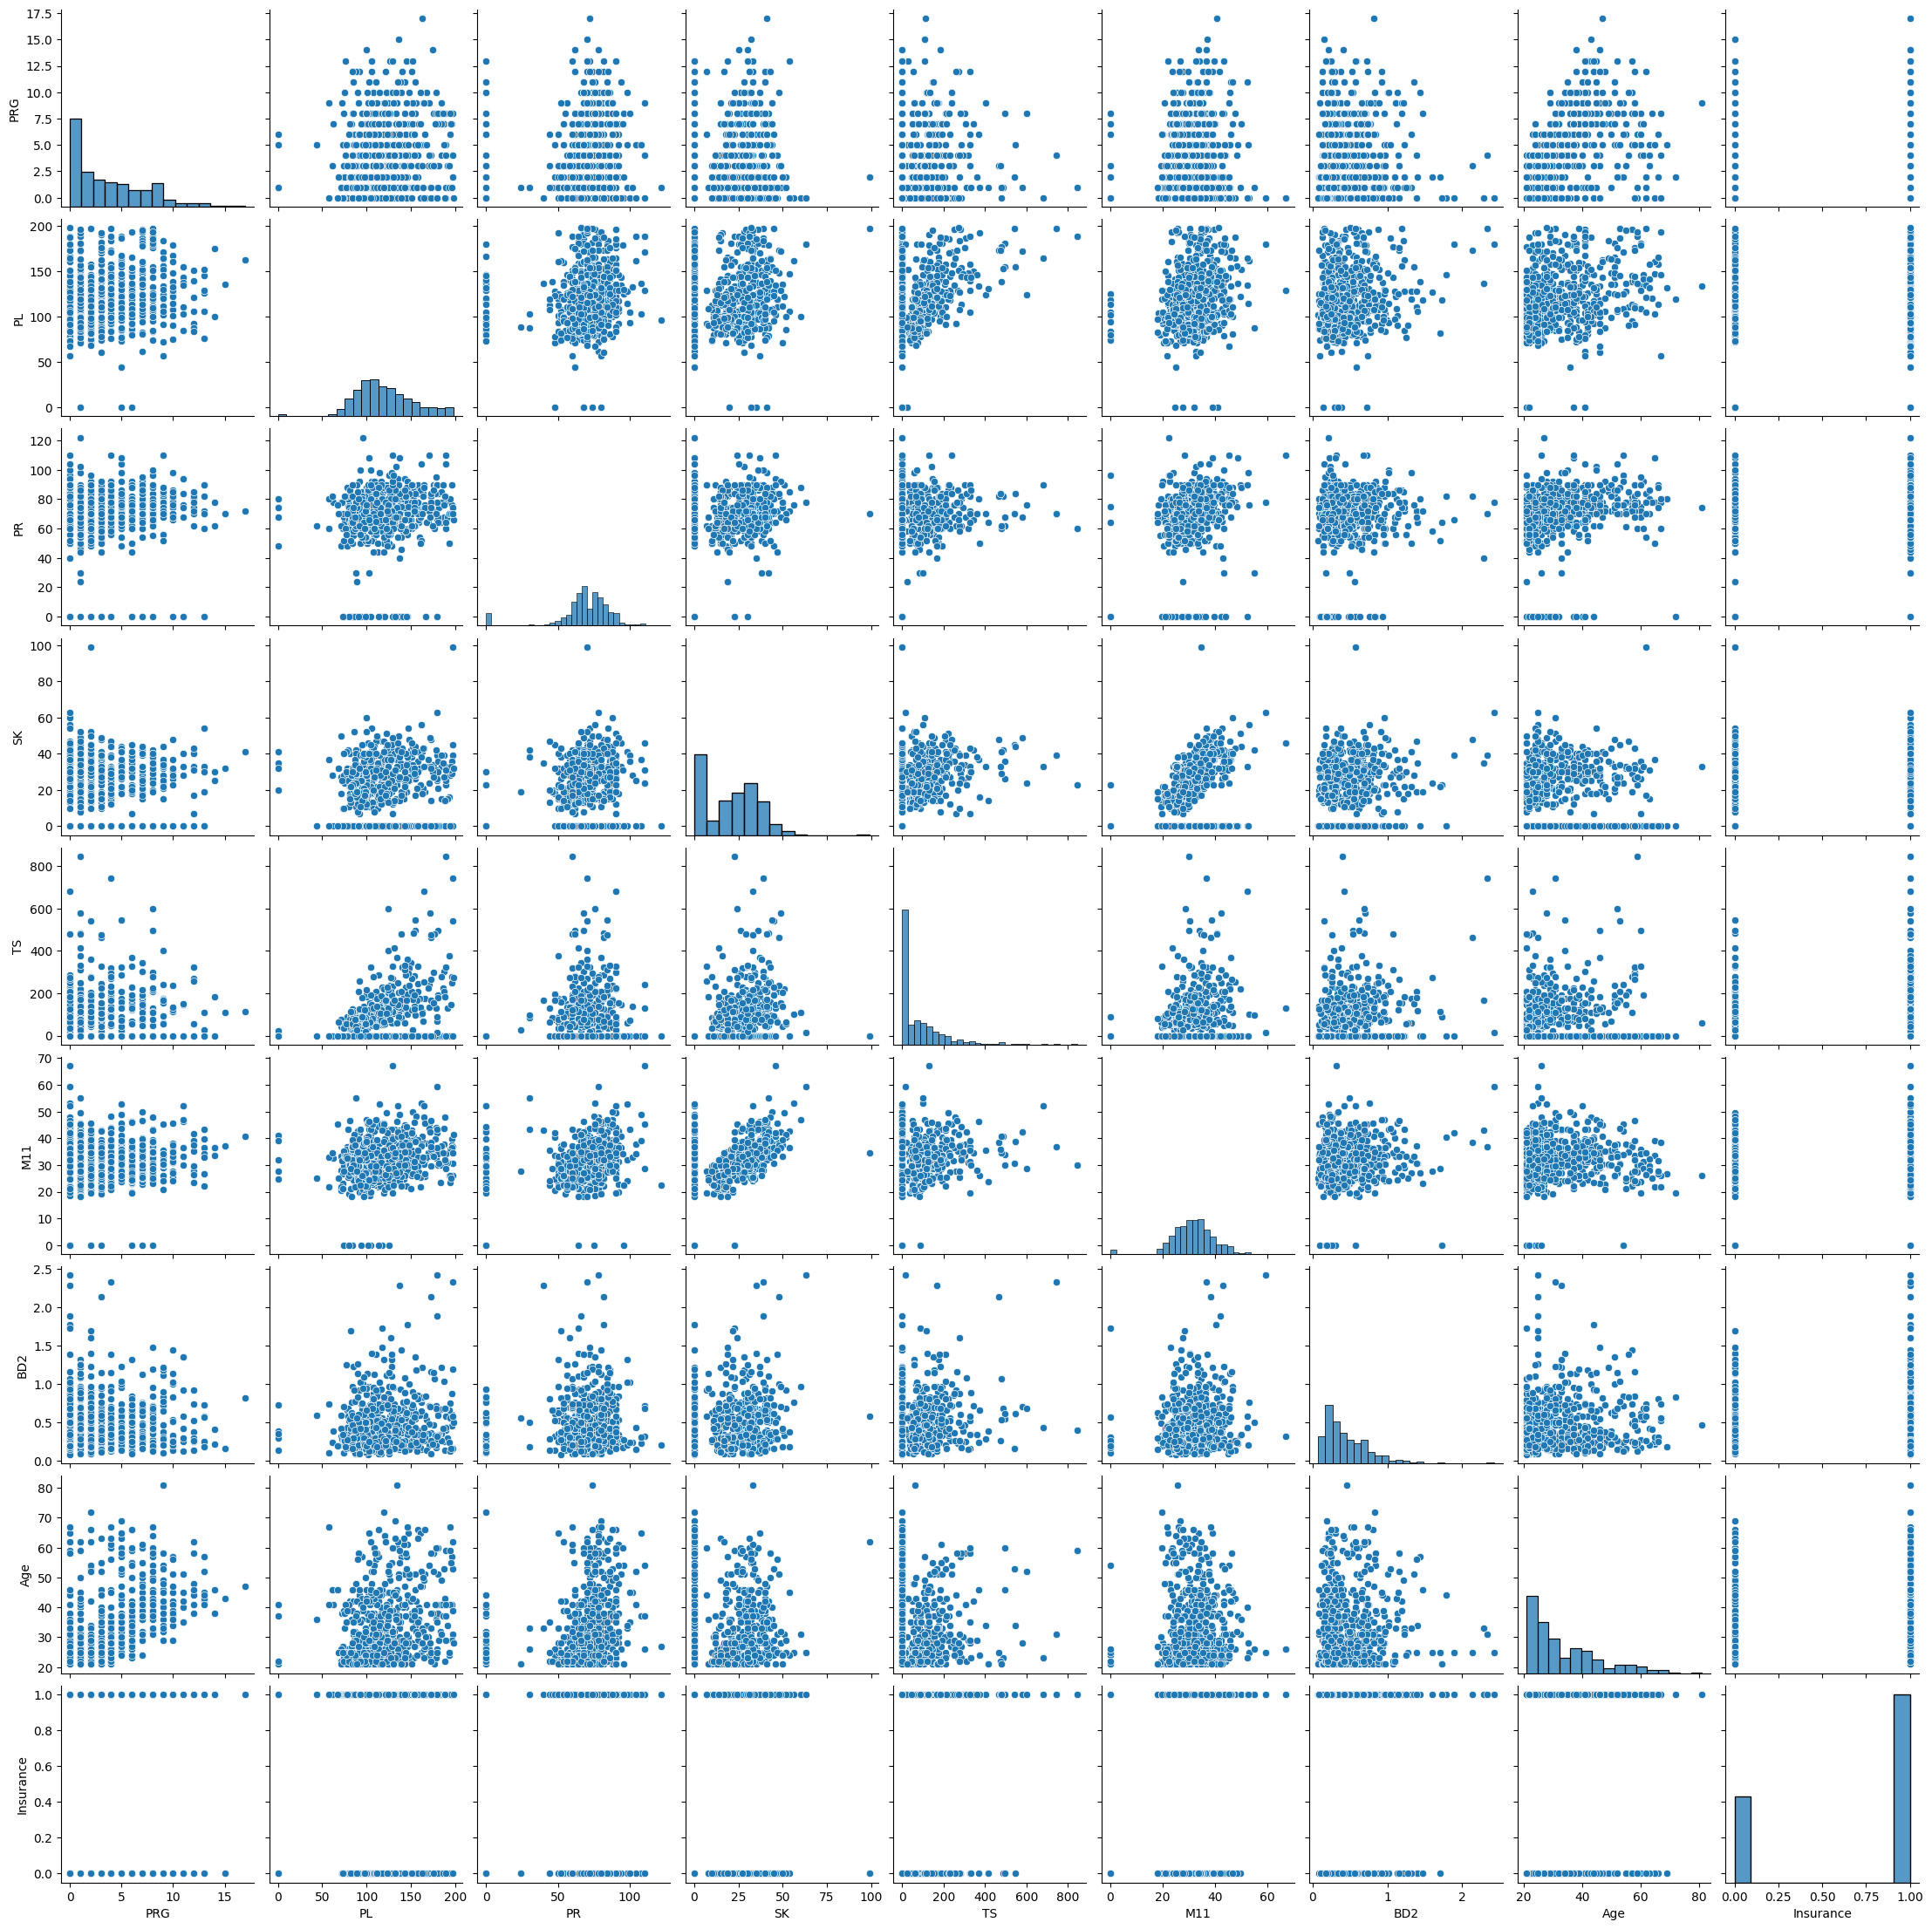

In [16]:
sns.pairplot(df_train)

<Axes: >

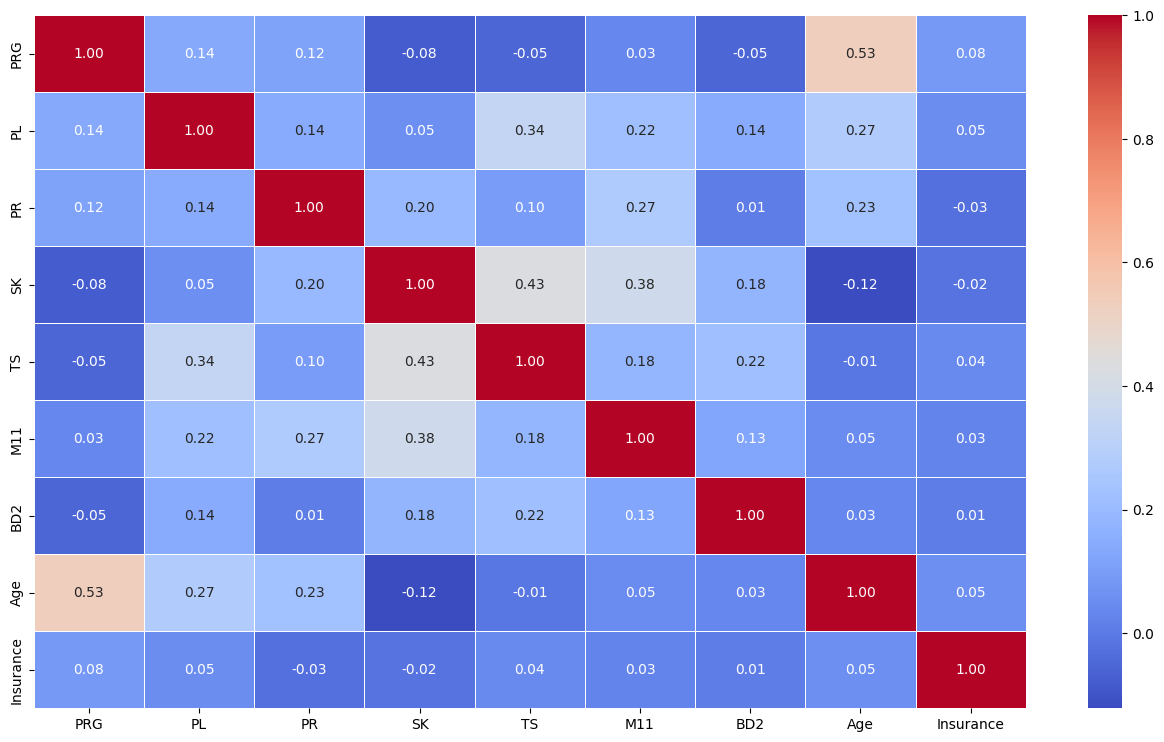

In [17]:
plt.figure(figsize = (16,9))
sns.heatmap(df_train.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidth=.5)

In [18]:
df_train.corr().loc['PRG'].abs().sort_values(ascending = False)

PRG          1.000000
Age          0.532545
PL           0.139541
PR           0.116680
Insurance    0.084631
SK           0.080902
TS           0.054812
BD2          0.052230
M11          0.033482
Name: PRG, dtype: float64

*Question - do we see change in correlation values after removing 6 sigma outliers?*

<Axes: >

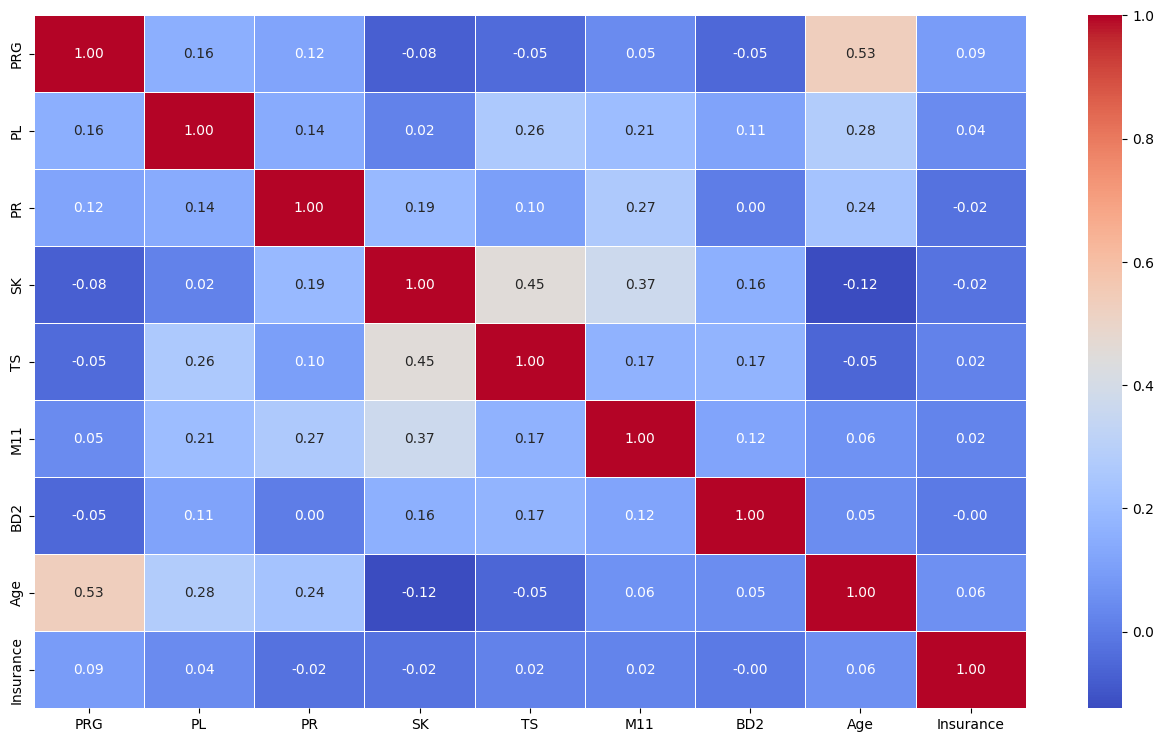

In [19]:
plt.figure(figsize = (16,9))
sns.heatmap(df_train_wo_outliers.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidth=.5)

In [20]:
df_train_wo_outliers.corr().loc['PRG'].abs().sort_values(ascending = False)

PRG          1.000000
Age          0.533666
PL           0.155409
PR           0.119420
Insurance    0.091934
SK           0.075463
BD2          0.052958
TS           0.045293
M11          0.045079
Name: PRG, dtype: float64

*Answer - No*

In [21]:
def ResultOutput(parameter, RMSE_train, RMSE_test):
  print(f'For {parameter} Linear Regression RMSE: Train = {RMSE_train:.2f}, Test = {RMSE_test:.2f} ')

## **EDA_test**

In [22]:
print(df_test.shape)
df_test.head()

(169, 10)


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


In [24]:
df_test.nunique()

ID           169
PRG           14
PL            85
PR            33
SK            36
TS            66
M11          122
BD2          156
Age           39
Insurance      2
dtype: int64

In [25]:
#identify missing values
print(df_test.isnull().sum())

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64


Text(0.5, 1.0, 'Data Distribution')

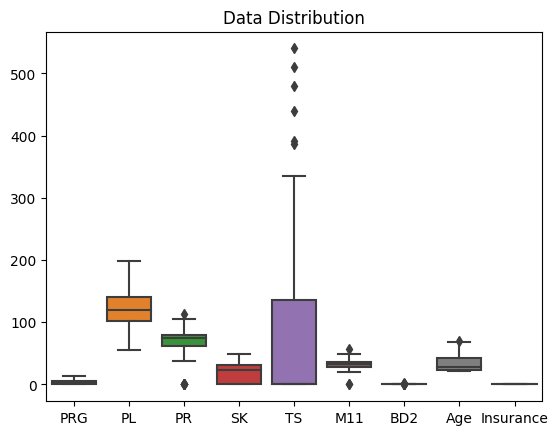

In [26]:
#Test the outliers
sns.boxplot(data=df_test).set_title('Data Distribution')

<Axes: >

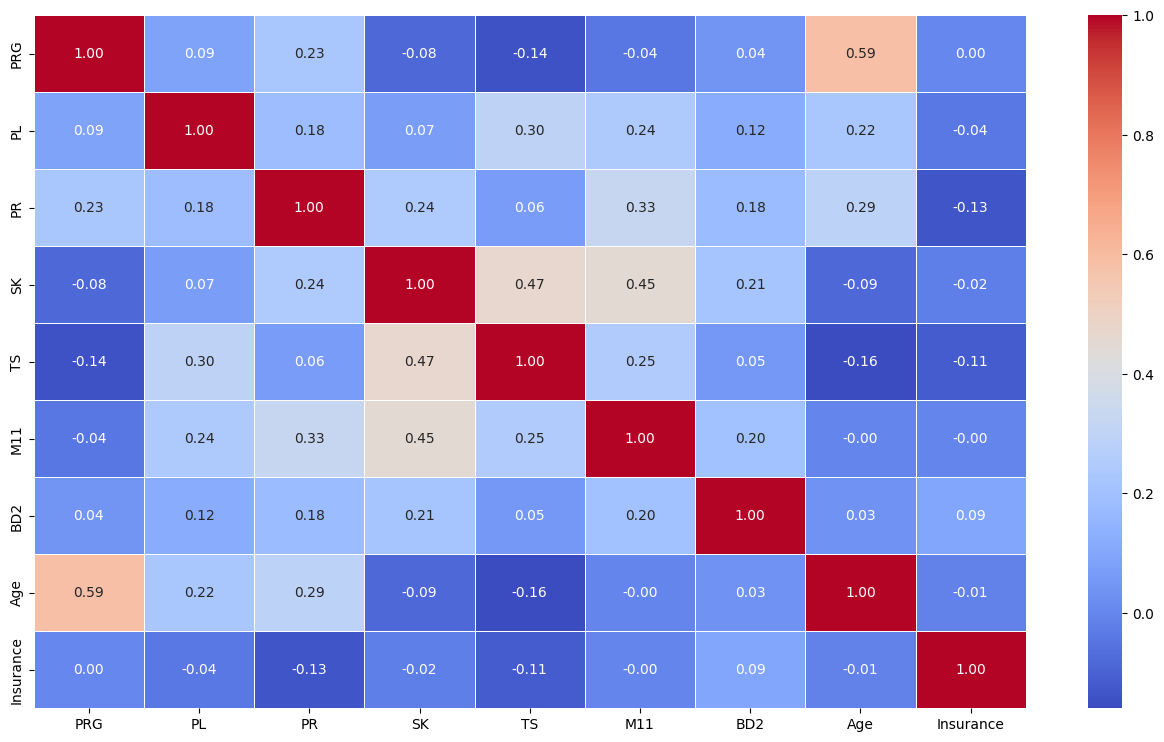

In [27]:
plt.figure(figsize = (16,9))
sns.heatmap(df_test.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidth=.5)

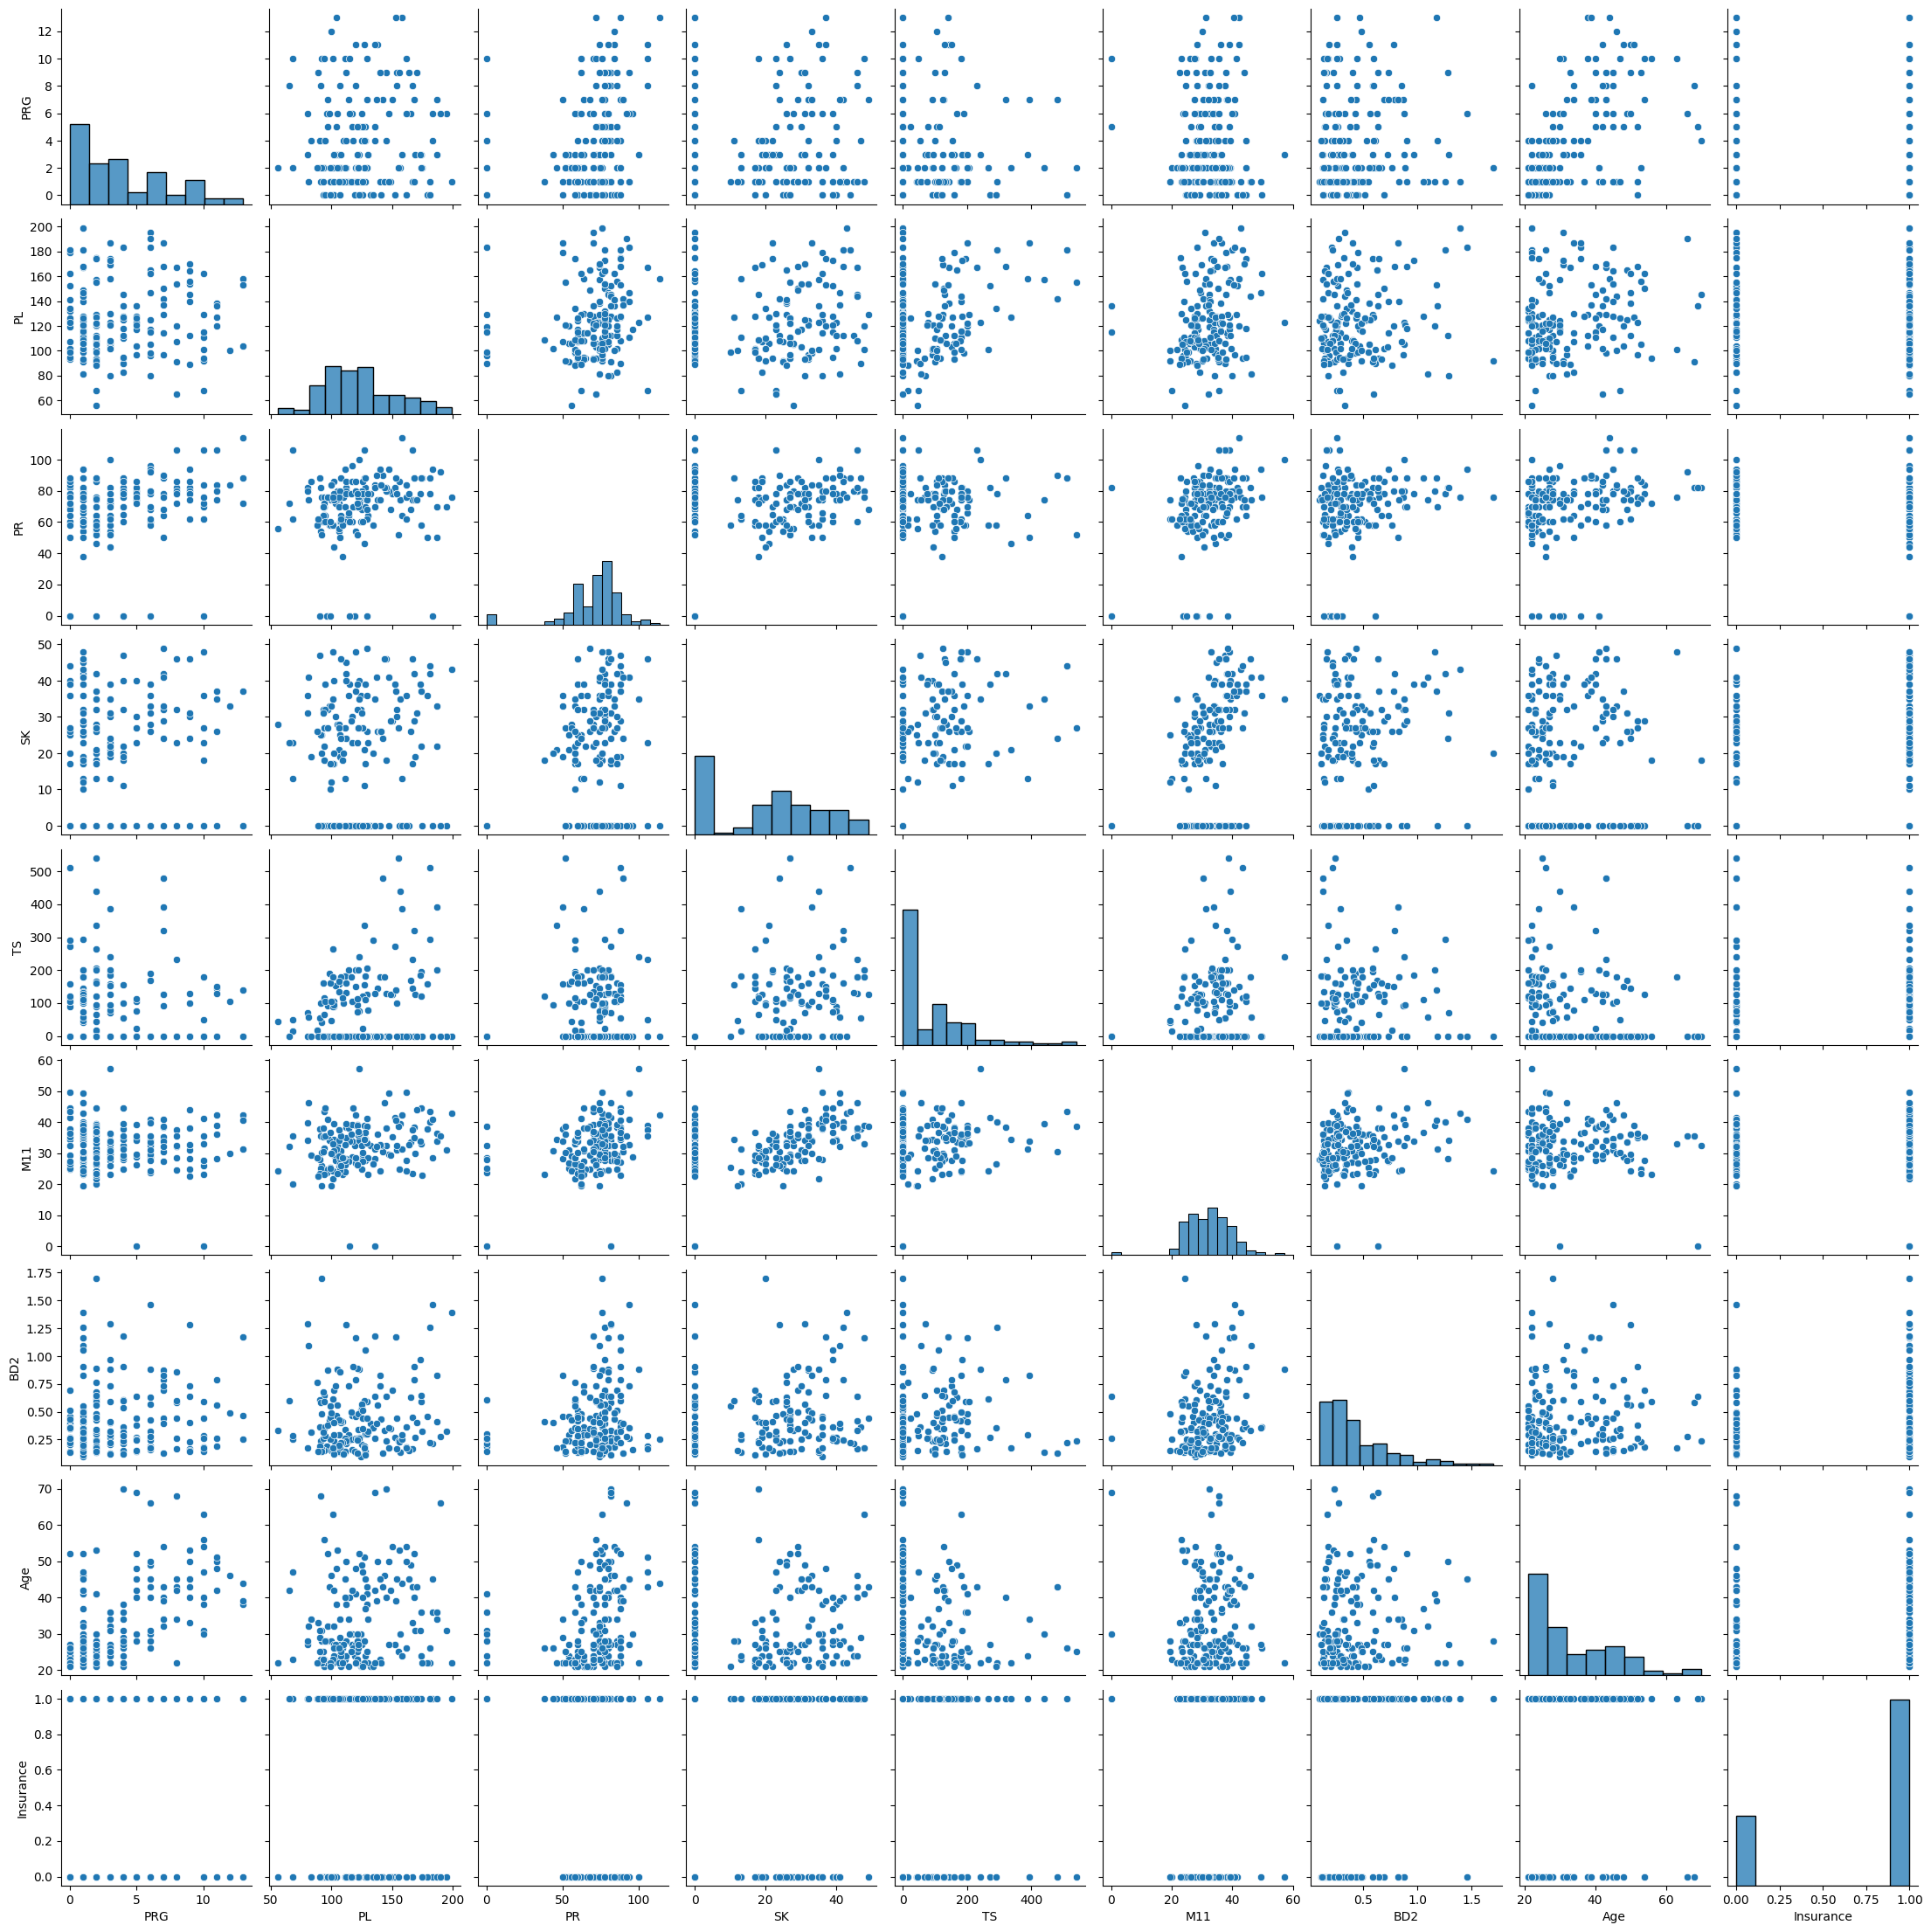

In [28]:
sns.pairplot(df_test)

In [29]:
#define empty dataframe for models compare summary
ModelsCompare = pd.DataFrame(columns = ['Model','Parameter', 'RMSE Train','RMSE Test'])
ModelsCompare.head()

,Model,Parameter,RMSE Train,RMSE Test


# **Linear regression with single feature**

In [30]:
X_train = df_train[['Age']]
y_train = df_train['PRG']

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
print("The model intercept is: {}".format(model.intercept_))
print("The model coefficients are: {}".format(model.coef_[0]))

The model intercept is: -1.215570142279216
The model coefficients are: 0.15140296450655685


Predicting with the model

In [33]:
y_train_pred = model.predict(X_train)

In [34]:
pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred}).head()

,y_train,y_train_pred
0,6,6.354578
1,1,3.477922
2,8,3.629325
3,1,1.963892
4,0,3.780728


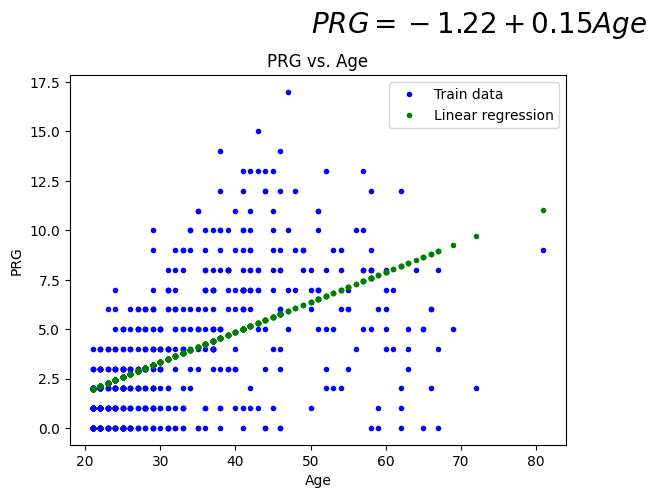

In [35]:
plt.figure()
plt.plot(X_train.Age, y_train, '.b')
plt.plot(X_train.Age, y_train_pred, 
         linewidth=3, color='g', ls='', marker='.')
plt.xlabel('Age')
plt.ylabel('PRG')
plt.title('PRG vs. Age')
plt.legend(['Train data', 'Linear regression'], loc='best')
plt.text(50, 20, '$PRG={:.2f}+{:.2f} Age$'\
         .format(model.intercept_, model.coef_[0]), fontsize=20);

In [36]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE = {train_rmse:.2f}")

RMSE = 2.84


**Assess the model**

In [37]:
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [38]:
df_test['PRG prediction'] = model.predict(df_test[['Age']])
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,2.720907
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,2.418101
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.023713
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.326519
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,6.960190


In [39]:
test_rmse = np.sqrt(mean_squared_error(df_test['PRG'], df_test['PRG prediction']))
print("RMSE = {:.2f}".format(test_rmse))

RMSE = 2.76


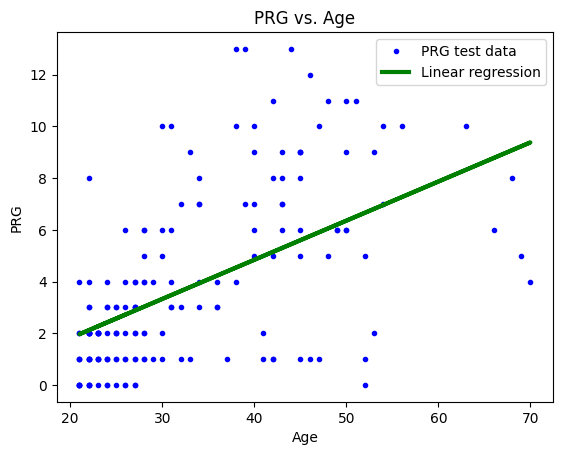

In [40]:
plt.figure()
plt.plot(df_test['Age'],df_test['PRG'],'.b')
plt.plot(df_test['Age'], df_test['PRG prediction'], 
         linewidth=3, color='g')
plt.xlabel('Age')
plt.ylabel('PRG')
plt.title('PRG vs. Age')
plt.legend(['PRG test data', 'Linear regression'], loc='best')

In [41]:
ResultOutput(X_train.columns[0], train_rmse, test_rmse)

For Age Linear Regression RMSE: Train = 2.84, Test = 2.76 


In [42]:
ModelsCompare.loc[len(ModelsCompare.index)] = ["Linear Regression", X_train.columns[0], train_rmse, test_rmse]


In [43]:
ModelsCompare.head()

,Model,Parameter,RMSE Train,RMSE Test
0,Linear Regression,Age,2.843937,2.758803


## **Linear Regression for PL**

In [44]:
X_train = df_train[['PL']]

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
print("The model intercept is: {}".format(model.intercept_))
print("The model coefficients are: {}".format(model.coef_[0]))

The model intercept is: 2.0995400377329543
The model coefficients are: 0.014358021416633695


In [47]:
y_train_pred = model.predict(X_train)

In [48]:
pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred}).head()

,y_train,y_train_pred
0,6,4.224527
1,1,3.319972
2,8,4.727058
3,1,3.377404
4,0,4.066589


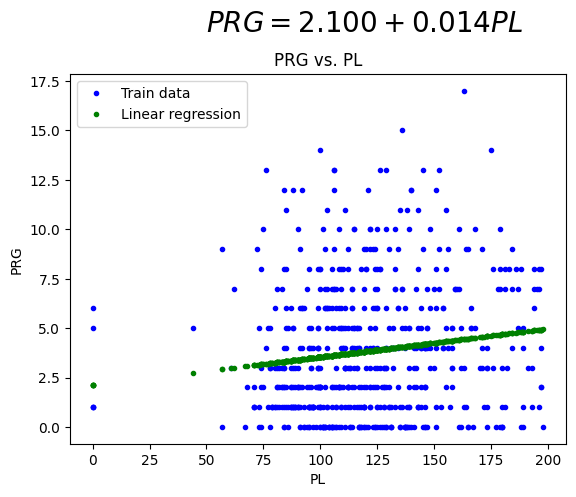

In [49]:
plt.figure()
plt.plot(X_train.PL, y_train, '.b')
plt.plot(X_train.PL, y_train_pred, 
         linewidth=3, color='g', ls='', marker='.')
plt.xlabel('PL')
plt.ylabel('PRG')
plt.title('PRG vs. PL')
plt.legend(['Train data', 'Linear regression'], loc='best')
plt.text(50, 20, '$PRG={:.3f}+{:.3f}PL$'\
         .format(model.intercept_, model.coef_[0]), fontsize=20);

In [50]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE = {train_rmse:.2f}")

RMSE = 3.33


Assess the model

In [51]:
df_test = pd.read_csv('Paitients_Files_Test.csv')
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [52]:
df_test['PRG prediction'] = model.predict(df_test[['PL']])
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.664564
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.650206
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.477910
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.879935
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,4.253243


In [53]:
test_rmse = np.sqrt(mean_squared_error(df_test['PRG'], df_test['PRG prediction']))
print("RMSE = {:.2f}".format(test_rmse))

RMSE = 3.38


In [54]:
ResultOutput(X_train.columns[0], train_rmse, test_rmse)

For PL Linear Regression RMSE: Train = 3.33, Test = 3.38 


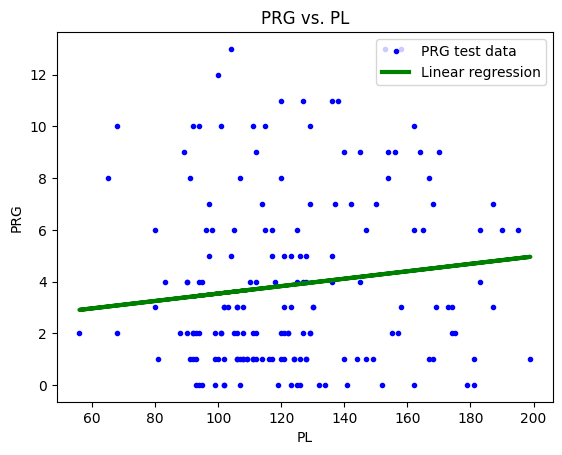

In [55]:
plt.figure()
plt.plot(df_test['PL'],df_test['PRG'],'.b')
plt.plot(df_test['PL'], df_test['PRG prediction'], 
         linewidth=3, color='g')
plt.xlabel('PL')
plt.ylabel('PRG')
plt.title('PRG vs. PL')
plt.legend(['PRG test data', 'Linear regression'], loc='best')

In [56]:
ModelsCompare.loc[len(ModelsCompare.index)] = ["Linear Regression", X_train.columns[0], train_rmse, test_rmse]
ModelsCompare.head()

,Model,Parameter,RMSE Train,RMSE Test
0,Linear Regression,Age,2.843937,2.758803
1,Linear Regression,PL,3.327157,3.381263


## **Linear Regression for TS**

In [57]:
X_train = df_train[['TS']]

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
print("The model intercept is: {}".format(model.intercept_))
print("The model coefficients are: {}".format(model.coef_[0]))

The model intercept is: 3.950346197857056
The model coefficients are: -0.0015811368892236235


In [60]:
y_train_pred = model.predict(X_train)

In [61]:
pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred}).head()

,y_train,y_train_pred
0,6,3.950346
1,1,3.950346
2,8,3.950346
3,1,3.801719
4,0,3.684715


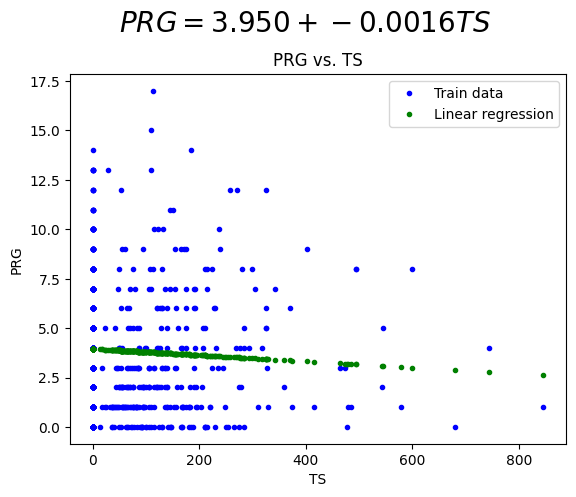

In [62]:
plt.figure()
plt.plot(X_train.TS, y_train, '.b')
plt.plot(X_train.TS, y_train_pred, 
         linewidth=3, color='g', ls='', marker='.')
plt.xlabel('TS')
plt.ylabel('PRG')
plt.title('PRG vs. TS')
plt.legend(['Train data', 'Linear regression'], loc='best')
plt.text(50, 20, '$PRG={:.3f}+{:.4f}TS$'\
         .format(model.intercept_, model.coef_[0]), fontsize=20);

In [63]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE = {train_rmse:.2f}")

RMSE = 3.35


**Assess the model**

In [64]:
df_test['PRG prediction'] = model.predict(df_test[['TS']])
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.760610
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.950346
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.950346
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.950346
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,3.751123


In [65]:
test_rmse = np.sqrt(mean_squared_error(df_test['PRG'], df_test['PRG prediction']))
print("RMSE = {:.2f}".format(test_rmse))

RMSE = 3.37


In [66]:
ResultOutput(X_train.columns[0], train_rmse, test_rmse)

For TS Linear Regression RMSE: Train = 3.35, Test = 3.37 


In [67]:
ModelsCompare.loc[len(ModelsCompare.index)] = ["Linear Regression", X_train.columns[0], train_rmse, test_rmse]
ModelsCompare.head()

,Model,Parameter,RMSE Train,RMSE Test
0,Linear Regression,Age,2.843937,2.758803
1,Linear Regression,PL,3.327157,3.381263
2,Linear Regression,TS,3.354980,3.373080


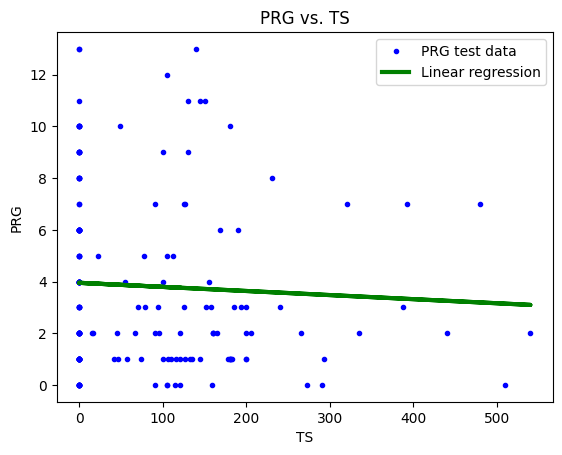

In [68]:
plt.figure()
plt.plot(df_test['TS'],df_test['PRG'],'.b')
plt.plot(df_test['TS'], df_test['PRG prediction'], 
         linewidth=3, color='g')
plt.xlabel('TS')
plt.ylabel('PRG')
plt.title('PRG vs. TS')
plt.legend(['PRG test data', 'Linear regression'], loc='best')

# **Multi Linear Regression**

In [69]:
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [70]:
X = df_train.drop(['ID','PRG','Sepssis' ], axis = 1)
X.head()

,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,148,72,35,0,33.6,0.627,50,0
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,1
4,137,40,35,168,43.1,2.288,33,1


In [71]:
y = df_train['PRG']
y.head()

0    6
1    1
2    8
3    1
4    0
Name: PRG, dtype: int64

In [72]:
model_multivar = LinearRegression(fit_intercept=False).fit(X, y)

In [73]:
formula = 'PRG = ' + f'{model_multivar.intercept_:.3f}'
for coef, feature in zip(model_multivar.coef_, X.columns[:8]):
    formula += f'{coef:+.3f}*{feature}'
print(formula)

PRG = 0.000-0.002*PL-0.006*PR+0.001*SK-0.001*TS-0.006*M11-0.758*BD2+0.146*Age+0.300*Insurance


In [74]:
df_train['PRG pred multivariate.'] = model_multivar.predict(X)
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,PRG pred multivariate.
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,6.001535
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,3.621603
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,3.635657
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,2.490019
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,2.547713


In [75]:
train_rmse = mean_squared_error(y_true=df_train['PRG'], 
                          y_pred=df_train['PRG pred multivariate.'], 
                          squared=False)
print("RMSE = {:.2f}".format(train_rmse))

RMSE = 2.83


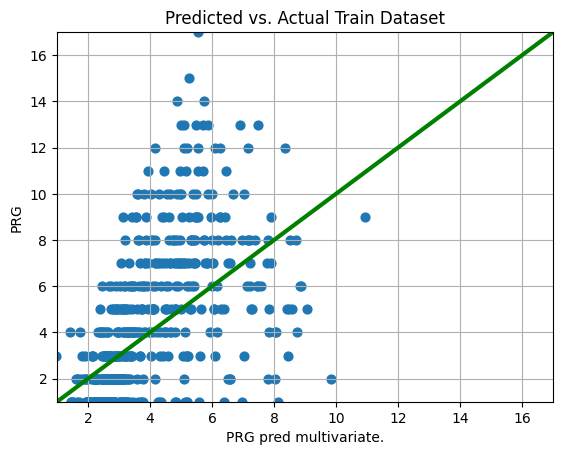

In [76]:
ax = df_train.plot('PRG pred multivariate.','PRG',
                     kind='scatter', s=40,
                     xlim=[1, 17], ylim=[1, 17],
                     title='Predicted vs. Actual Train Dataset',
                   grid = True)
ax.plot(np.linspace(1, 17, 2), np.linspace(1, 17, 2),
        linewidth=3, color='g')

In [77]:
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.760610
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.950346
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.950346
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.950346
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,3.751123


In [78]:
X = df_test.drop(['ID','PRG','PRG prediction'], axis = 1)
X.head()

,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,109,38,18,120,23.1,0.407,26,1
1,108,88,19,0,27.1,0.400,24,1
2,96,0,0,0,23.7,0.190,28,1
3,124,74,36,0,27.8,0.100,30,1
4,150,78,29,126,35.2,0.692,54,0


In [79]:
df_test['PRG pred multivariate.'] = model_multivar.predict(X)
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction,PRG pred multivariate.
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.760610,3.150688
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.950346,2.685207
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.950346,3.927761
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.950346,3.855688
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,3.751123,6.357743


In [80]:
test_rmse = mean_squared_error(y_true=df_test['PRG'], 
                          y_pred=df_test['PRG pred multivariate.'], 
                          squared=False)
print("RMSE = {:.2f}".format(test_rmse))

RMSE = 2.79


In [81]:
ResultOutput("Multivariate", train_rmse, test_rmse)

For Multivariate Linear Regression RMSE: Train = 2.83, Test = 2.79 


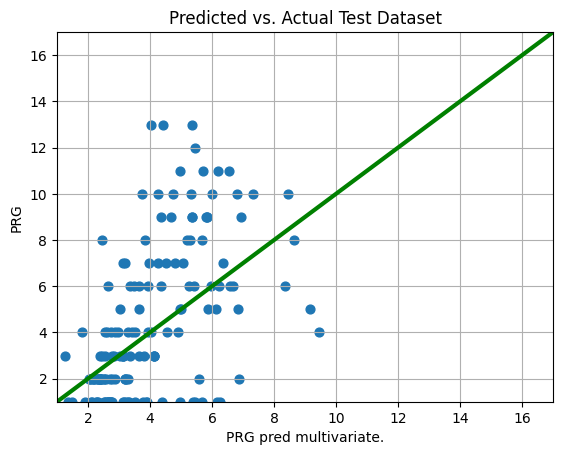

In [82]:
ax = df_test.plot('PRG pred multivariate.','PRG',
                     kind='scatter', s=40,
                     xlim=[1, 17], ylim=[1, 17],
                     title='Predicted vs. Actual Test Dataset',
                  grid = True)
ax.plot(np.linspace(1, 17, 2), np.linspace(1, 17, 2),
        linewidth=3, color='g')

In [83]:
ModelsCompare.loc[len(ModelsCompare.index)] = ["Linear Regression", "Multi Variate Regression", train_rmse, test_rmse]
ModelsCompare.head()

,Model,Parameter,RMSE Train,RMSE Test
0,Linear Regression,Age,2.843937,2.758803
1,Linear Regression,PL,3.327157,3.381263
2,Linear Regression,TS,3.354980,3.373080
3,Linear Regression,Multi Variate Regression,2.834103,2.792034


## **Decision tree**

In [84]:
df_train.drop('PRG pred multivariate.', axis = 1, inplace = True)
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [85]:
X = df_train.drop(['PRG','ID', 'Sepssis'], axis=1)
y = df_train['PRG']

model = DecisionTreeRegressor(min_samples_leaf=10, 
                              ccp_alpha=0.01, 
                              max_leaf_nodes=40,
                              max_depth=6)
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.01, max_depth=6, max_leaf_nodes=40,
                      min_samples_leaf=10)

In [86]:
def visualize_tree(model, md=2, fs=(12, 8)):
    plt.figure(figsize=fs)
    plot_tree(model,
            max_depth=md,
            feature_names=model.feature_names_in_,
            label='all',
            filled=True,
            rounded=True, 
            fontsize=12);

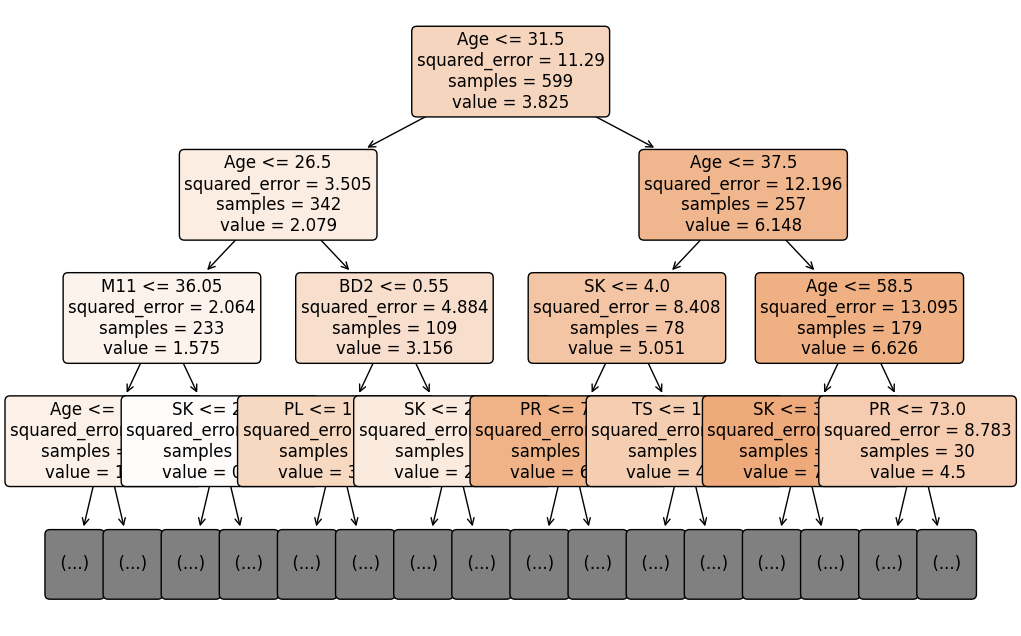

In [87]:
visualize_tree(model, md=3)

In [88]:
export_graphviz(model)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[6] <= 31.5\\nsquared_error = 11.29\\nsamples = 599\\nvalue = 3.825"] ;\n1 [label="x[6] <= 26.5\\nsquared_error = 3.505\\nsamples = 342\\nvalue = 2.079"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="x[4] <= 36.05\\nsquared_error = 2.064\\nsamples = 233\\nvalue = 1.575"] ;\n1 -> 2 ;\n3 [label="x[6] <= 22.5\\nsquared_error = 2.098\\nsamples = 179\\nvalue = 1.771"] ;\n2 -> 3 ;\n4 [label="x[5] <= 0.449\\nsquared_error = 1.136\\nsamples = 91\\nvalue = 1.308"] ;\n3 -> 4 ;\n5 [label="x[5] <= 0.301\\nsquared_error = 1.302\\nsamples = 57\\nvalue = 1.526"] ;\n4 -> 5 ;\n6 [label="squared_error = 1.199\\nsamples = 40\\nvalue = 1.275"] ;\n5 -> 6 ;\n7 [label="squared_error = 1.045\\nsamples = 17\\nvalue = 2.118"] ;\n5 -> 7 ;\n8 [label="squared_error = 0.644\\nsamples = 34\\nvalue = 0.941"] ;\n4 -> 8 ;\n9 [label="x[2] <= 24.5\\nsquared_error = 2.642\\nsamples = 88\\nvalu

In [89]:
y_pred = model.predict(X)

In [90]:
PRG_rmse = mse(y, y_pred, squared=False)
print(f"RMSE = {PRG_rmse:.2f}")
# print(y.mean())

RMSE = 2.22


In [91]:
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f'{feature:12}: {importance}')

PL          : 0.02049457117543289
PR          : 0.04767416454428264
SK          : 0.05574910414264921
TS          : 0.0377608702217554
M11         : 0.017395111971378566
BD2         : 0.02894067207480957
Age         : 0.7919855058696916
Insurance   : 0.0


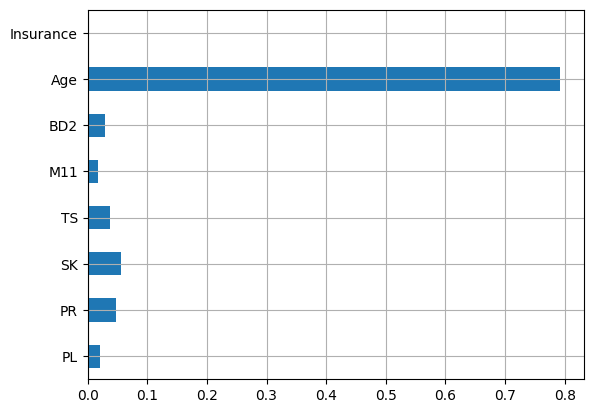

In [92]:
pd.Series(model.feature_importances_, index=X.columns).plot.barh().grid(True)

Model Validation

In [93]:
df_test.drop(['ID','PRG prediction', 'PRG pred multivariate.' ], axis=1, inplace = True)
df_test.head()


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,1,109,38,18,120,23.1,0.407,26,1
1,1,108,88,19,0,27.1,0.400,24,1
2,6,96,0,0,0,23.7,0.190,28,1
3,1,124,74,36,0,27.8,0.100,30,1
4,7,150,78,29,126,35.2,0.692,54,0


In [94]:
X = df_test.drop(['PRG',], axis=1)
y = df_test['PRG']

In [95]:
y_pred = model.predict(X)

In [96]:
PG_Test_rmse = mse(y, y_pred, squared=False)
print(f"RMSE = {PG_Test_rmse:.2f}")

RMSE = 2.76


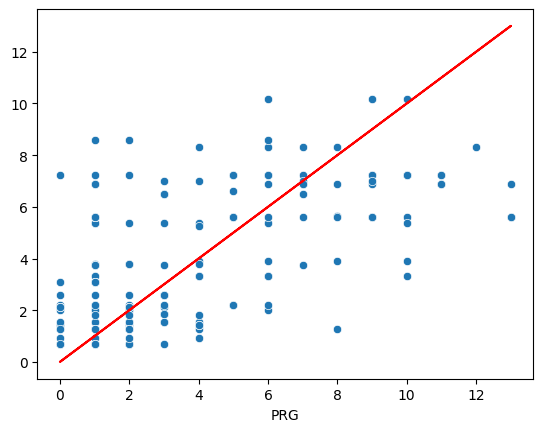

In [97]:
#Visualize
ax = sns.scatterplot(x=y, y=y_pred)
ax.plot(y, y, 'r')

In [98]:
ModelsCompare.loc[len(ModelsCompare.index)] = ["Decision Tree", "Non Optimized Hyper Parameters", PRG_rmse, PG_Test_rmse]
ModelsCompare['RMSE Delta'] = (ModelsCompare['RMSE Train'] - ModelsCompare['RMSE Test'] ).abs()
ModelsCompare.head()

,Model,Parameter,RMSE Train,RMSE Test,RMSE Delta
0,Linear Regression,Age,2.843937,2.758803,0.085134
1,Linear Regression,PL,3.327157,3.381263,0.054106
2,Linear Regression,TS,3.354980,3.373080,0.018100
3,Linear Regression,Multi Variate Regression,2.834103,2.792034,0.042069
4,Decision Tree,Non Optimized Hyper Parameters,2.224552,2.759805,0.535253


# **Decision Tree Optimization by Hyper Parameters fine tune**

In [99]:
DT_ModelsCompare = pd.DataFrame(columns = ['Model','Parameter', 'RMSE Train','RMSE Test'])

for depth in range(1,6,1):
  for num_of_leafs in range(1,4,1):
    X = df_train.drop(['PRG','ID', 'Sepssis'], axis=1)
    y = df_train['PRG']

    model = DecisionTreeRegressor(min_samples_leaf=num_of_leafs, 
                              ccp_alpha=0.01, 
                              max_leaf_nodes=40,
                              max_depth=depth)
    model.fit(X, y)

    y_pred = model.predict(X)
    PRG_rmse = mse(y, y_pred, squared=False)

    # df_test.drop(['ID','PRG prediction', 'PRG pred multivariate.' ], axis=1, inplace = True)
    # df_test.head()

    X = df_test.drop(['PRG',], axis=1)
    y = df_test['PRG']  

    y_pred = model.predict(X)  
    PG_Test_rmse = mse(y, y_pred, squared=False)

    DT_ModelsCompare.loc[len(DT_ModelsCompare.index)] = ["Decision Tree", "Num Leafs ="+str(num_of_leafs)+"/ Depth = "+str(depth), PRG_rmse, PG_Test_rmse]

DT_ModelsCompare['RMSE Delta'] = (DT_ModelsCompare['RMSE Train'] - DT_ModelsCompare['RMSE Test']).abs()
pd.options.display.float_format = "{:,.3f}".format
DT_ModelsCompare

,Model,Parameter,RMSE Train,RMSE Test,RMSE Delta
0,Decision Tree,Num Leafs =1/ Depth = 1,2.690,2.724,0.034
1,Decision Tree,Num Leafs =2/ Depth = 1,2.690,2.724,0.034
2,Decision Tree,Num Leafs =3/ Depth = 1,2.690,2.724,0.034
3,Decision Tree,Num Leafs =1/ Depth = 2,2.588,2.581,0.007
4,Decision Tree,Num Leafs =2/ Depth = 2,2.588,2.581,0.007
5,Decision Tree,Num Leafs =3/ Depth = 2,2.588,2.581,0.007
6,Decision Tree,Num Leafs =1/ Depth = 3,2.484,2.573,0.090
7,Decision Tree,Num Leafs =2/ Depth = 3,2.484,2.573,0.090
8,Decision Tree,Num Leafs =3/ Depth = 3,2.484,2.573,0.090
9,Decision Tree,Num Leafs =1/ Depth = 4,2.359,2.547,0.188


In [100]:
DT_min_RMSE = DT_ModelsCompare.loc[DT_ModelsCompare['RMSE Delta'].idxmin()]
DT_min_RMSE

Model                   Decision Tree
Parameter     Num Leafs =1/ Depth = 2
RMSE Train                      2.588
RMSE Test                       2.581
RMSE Delta                      0.007
Name: 3, dtype: object

In [101]:
ModelsCompare.loc[len(ModelsCompare.index)] = [DT_min_RMSE.loc['Model'], DT_min_RMSE.loc['Parameter'], DT_min_RMSE.loc['RMSE Train'], DT_min_RMSE.loc['RMSE Test'], DT_min_RMSE.loc['RMSE Delta']]

In [102]:
ModelsCompare

,Model,Parameter,RMSE Train,RMSE Test,RMSE Delta
0,Linear Regression,Age,2.844,2.759,0.085
1,Linear Regression,PL,3.327,3.381,0.054
2,Linear Regression,TS,3.355,3.373,0.018
3,Linear Regression,Multi Variate Regression,2.834,2.792,0.042
4,Decision Tree,Non Optimized Hyper Parameters,2.225,2.760,0.535
5,Decision Tree,Num Leafs =1/ Depth = 2,2.588,2.581,0.007


## **k Nearest Neighbour**

In [103]:
X = df_train.drop(['ID','PRG','Sepssis','Insurance' ], axis = 1)
X.head()
X_test = df_test.drop(['PRG','Insurance'], axis = 1)
y = df_train['PRG']
y_test = df_test['PRG']

In [104]:
#Normalization of the columns

num_cols = ['PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)   #np.array
X_n=pd.DataFrame(X_norm, columns=num_cols)
print(X_n)

X_n_test=mms.transform(X_test)
X_n_t=pd.DataFrame(X_n_test, columns=num_cols)
X_n_t

       PL    PR    SK    TS   M11   BD2   Age
0   0.747 0.590 0.354 0.000 0.501 0.234 0.483
1   0.429 0.541 0.293 0.000 0.396 0.117 0.167
2   0.924 0.525 0.000 0.000 0.347 0.254 0.183
3   0.449 0.541 0.232 0.111 0.419 0.038 0.000
4   0.692 0.328 0.354 0.199 0.642 0.944 0.200
..    ...   ...   ...   ...   ...   ...   ...
594 0.621 0.590 0.455 0.272 0.501 0.280 0.217
595 0.949 0.672 0.141 0.219 0.477 0.258 0.017
596 0.338 0.623 0.000 0.000 0.675 0.050 0.417
597 0.449 0.197 0.192 0.030 0.414 0.205 0.000
598 0.874 0.607 0.000 0.000 0.548 0.004 0.283

[599 rows x 7 columns]


,PL,PR,SK,TS,M11,BD2,Age
0,0.551,0.311,0.182,0.142,0.344,0.140,0.083
1,0.545,0.721,0.192,0.000,0.404,0.137,0.050
2,0.485,0.000,0.000,0.000,0.353,0.048,0.117
3,0.626,0.607,0.364,0.000,0.414,0.009,0.150
4,0.758,0.639,0.293,0.149,0.525,0.262,0.550
...,...,...,...,...,...,...,...
164,0.510,0.623,0.485,0.213,0.490,0.040,0.700
165,0.616,0.574,0.273,0.000,0.548,0.112,0.100
166,0.611,0.590,0.232,0.132,0.390,0.071,0.150
167,0.636,0.492,0.000,0.000,0.449,0.116,0.433


Text(0.5, 1.0, 'Normalization_test')

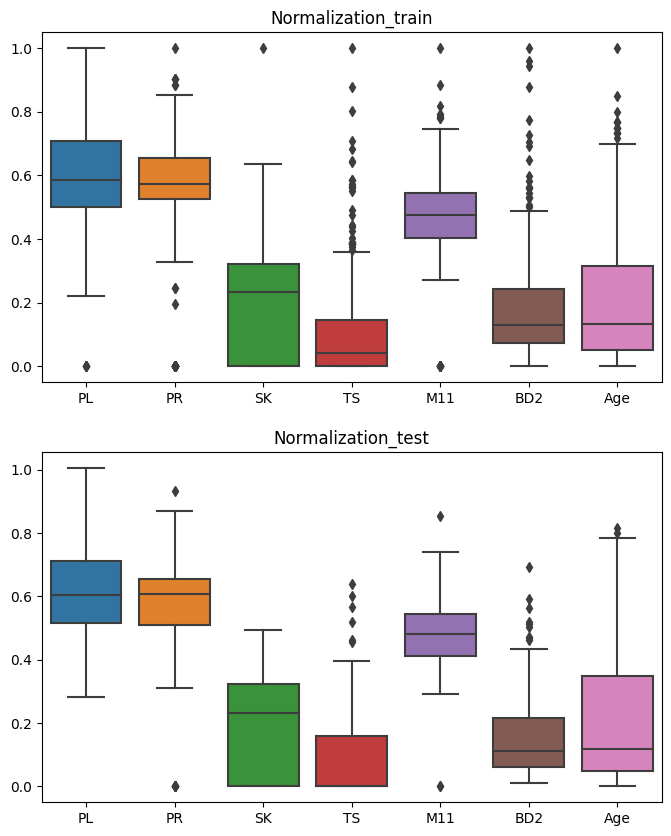

In [105]:
# create a figure with two subplots
fig, axs = plt.subplots(nrows=2,  figsize=(8,10))

# create boxplots in each subplot using seaborn
sns.boxplot(data=X_n, ax=axs[0]).set_title('Normalization_train')
sns.boxplot(data=X_n_t, ax=axs[1]).set_title('Normalization_test')

In [106]:
# finding best k value
#This algorithm is performing a 5-fold cross-validation to obtain an estimate of the model's accuracy for each k value.

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()  #standardize the feature
X = scaler.fit_transform(X_n)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_n, y, cv=5) #perform 5-fold cross-validation on the KNN model for the current k value. 
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

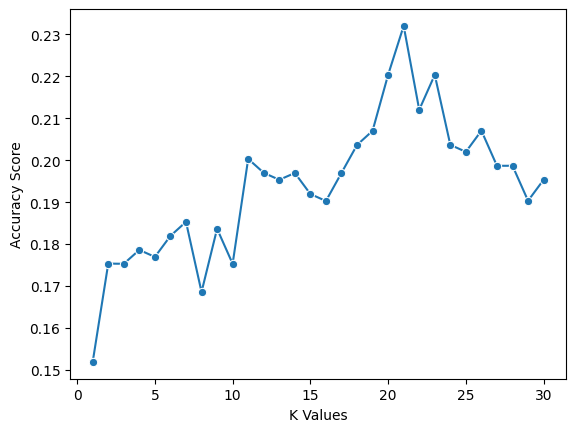

In [107]:
# plot the results
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [108]:
results = pd.Series(dict(zip(k_values, scores)))
results_sorted = results.sort_values(ascending=False)
results_sorted
#K=21 gives us the best accuracy score

21   0.232
20   0.220
23   0.220
22   0.212
26   0.207
19   0.207
24   0.204
18   0.204
25   0.202
11   0.200
28   0.199
27   0.199
12   0.197
17   0.197
14   0.197
30   0.195
13   0.195
15   0.192
29   0.190
16   0.190
7    0.185
9    0.184
6    0.182
4    0.179
5    0.177
2    0.175
10   0.175
3    0.175
8    0.169
1    0.152
dtype: float64

In [109]:
#Calculate RMSE_train &RMSE_test for each k
k_values = range(1, 31)
RMSE_train = []
RMSE_test = []
RMSE_diff = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn.fit(X_n, y)
    y_train_pred = knn.predict(X_n)
    y_test_pred = knn.predict(X_n_t)
    rmse_train = np.sqrt(mse(y, y_train_pred))
    rmse_test = np.sqrt(mse(y_test, y_test_pred))
    RMSE_train.append(rmse_train)   #list
    RMSE_test.append(rmse_test)   #list
    RMSE_diff.append(rmse_test - rmse_train)

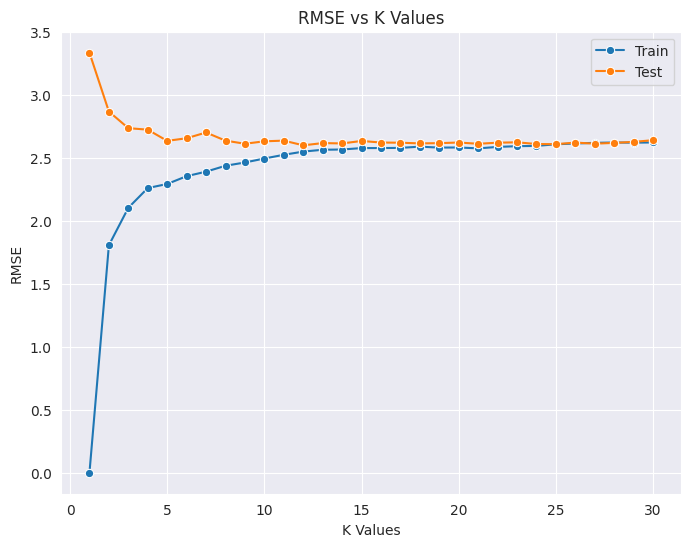

In [110]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))

sns.lineplot(x=k_values, y=RMSE_train, marker='o', label='Train')
sns.lineplot(x=k_values, y=RMSE_test, marker='o', label='Test')

plt.xlabel("K Values")
plt.ylabel("RMSE")
plt.title('RMSE vs K Values')
plt.legend()
plt.show()

In [111]:
k_df = pd.DataFrame({'RMSE_train': RMSE_train, 'RMSE_test': RMSE_test, 'RMSE_diff': RMSE_diff}, index=k_values)
k_df

,RMSE_train,RMSE_test,RMSE_diff
1,0.000,3.338,3.338
2,1.808,2.870,1.062
3,2.106,2.738,0.633
4,2.262,2.726,0.464
5,2.295,2.638,0.343
6,2.357,2.658,0.301
7,2.393,2.704,0.311
8,2.440,2.639,0.200
9,2.466,2.615,0.149
10,2.497,2.634,0.137


In [112]:
min_index = k_df['RMSE_diff'].idxmin()
min_value = k_df.loc[min_index, 'RMSE_diff']
print(f"The minimum RMSE difference is {min_value:.3f} at k={min_index}.")

The minimum RMSE difference is -0.007 at k=27.


In [113]:
knn=KNeighborsRegressor(n_neighbors=21)
knn.fit(X_n, y)

KNeighborsRegressor(n_neighbors=21)

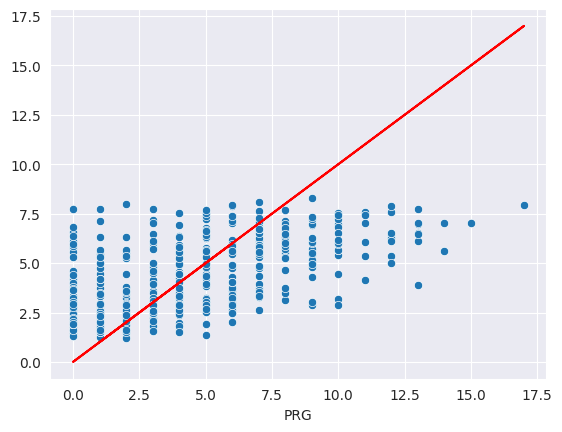

In [114]:
y_knn_pred = knn.predict(X_n)

ax = sns.scatterplot(x=y, y=y_knn_pred)
ax.plot(y, y, 'r')

In [115]:
train_RMSE = mse(y, y_knn_pred)**0.5
print(train_RMSE, y.mean())

2.577635875921624 3.8247078464106843


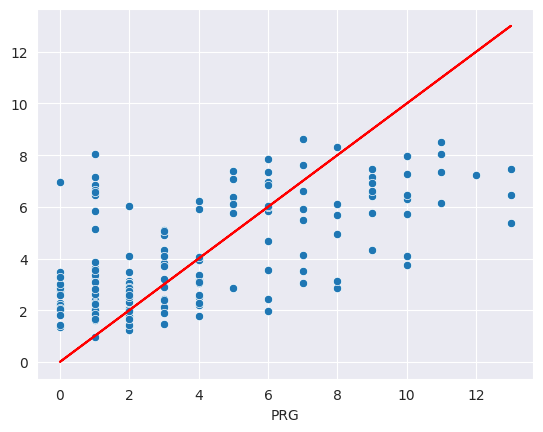

In [116]:
#Validating the model
y_knntest_pred = knn.predict(X_n_t)

ax = sns.scatterplot(x=y_test, y=y_knntest_pred)
ax.plot(y_test, y_test, 'r')

In [117]:
RMSE = mse(y_test, y_knntest_pred)**0.5
RMSE

2.6142967746138575

In [118]:
ModelsCompare.loc[len(ModelsCompare.index)] = ["kNN", "k=21", train_RMSE, RMSE, abs(train_RMSE - RMSE )]


In [119]:
ModelsCompare

,Model,Parameter,RMSE Train,RMSE Test,RMSE Delta
0,Linear Regression,Age,2.844,2.759,0.085
1,Linear Regression,PL,3.327,3.381,0.054
2,Linear Regression,TS,3.355,3.373,0.018
3,Linear Regression,Multi Variate Regression,2.834,2.792,0.042
4,Decision Tree,Non Optimized Hyper Parameters,2.225,2.760,0.535
5,Decision Tree,Num Leafs =1/ Depth = 2,2.588,2.581,0.007
6,kNN,k=21,2.578,2.614,0.037


**Summary:**

Among 7 different models trained, best result approached by using Decision Tree Model with optimized hyper parameters in terms of minumal RMSE for train and test datasets and RMSE delta.